![Aeropython Logo](/files/imagenes/aeropython_logo.png)

#Algoritmos genéticos para resolver laberintos

In [6]:
#Usaremos el paquete en el ejercicio del laberinto
import laberinto.laberinto as lab
ag = lab.ag
%matplotlib inline

Supongamos que tenemos el siguiente laberinto, al que accedemos por la izquierda y que queremos resolver:

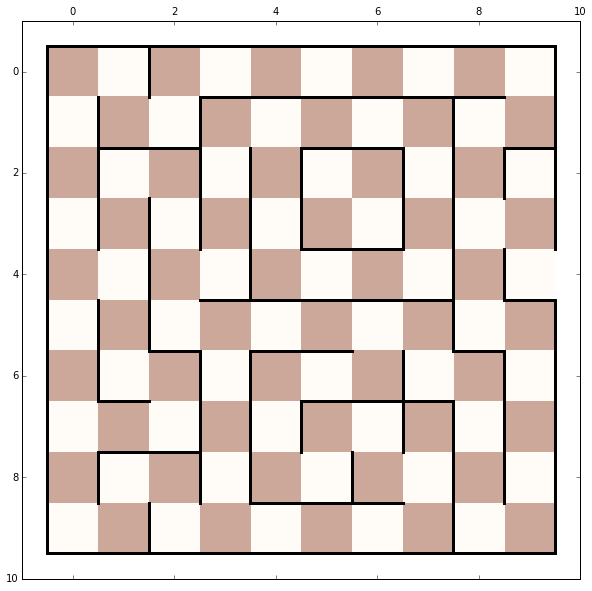

In [7]:
mapa1 = lab.Map()
mapa1.draw_tablero()

En el ejercicio se detalla más el proceso, llamemos aquí simplemente al algoritmo genético que lo resuelve:

1·2·3·4·5·6·7·8·9·10·11·12·13·14·15·16·17·18·19·20·21·22·23·24·25·26·27·28·29·30·31·32·33·34·35·36·37·38·39·40·41·42·43·44·45·46·47·48·49·50·51·52·53·54·55·56·57·58·59·60·61·62·63·64·65·66·67·68·69·70·71·72·73·74·75·76·77·78·79·80·81·82·83·84·85·86·87·88·89·90·91·92·93·94·95·96·97·98·99·100·

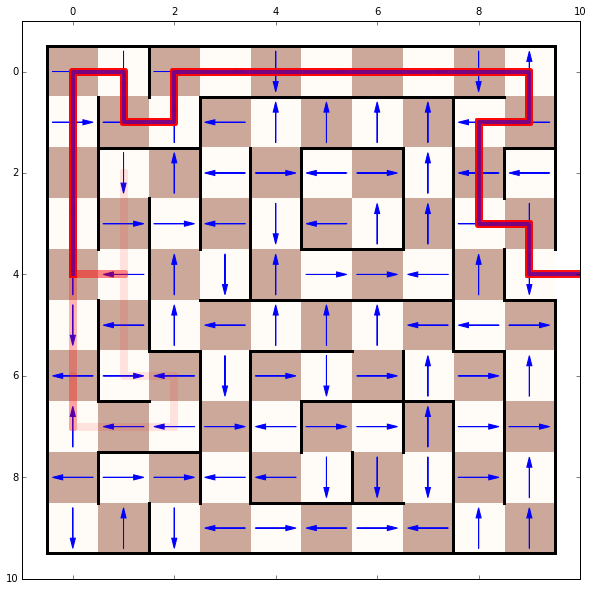

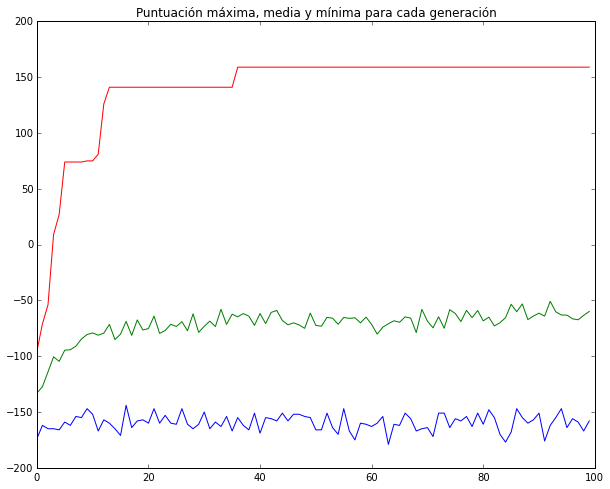

In [8]:
mapa1 = lab.Map()
lab.avanzar(mapa1)
lab.draw_all(mapa1)

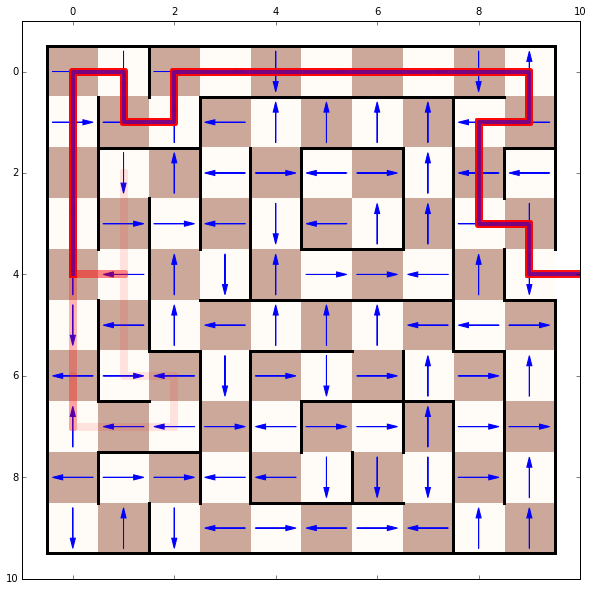

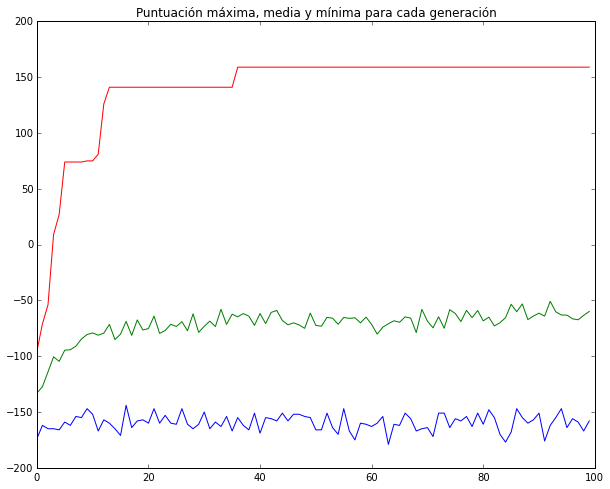

In [9]:
lab.draw_all(mapa1)

Lo más probable es que hayas obtenido una solución o un camino cerrado en un bucle. Puedes ejecutar la celda superior varias veces para hecerte una idea aproximada de con qué frecuencia aparece cada situación. Pero, ¿por qué aparecen estos bucles?

Examinemos qué aspecto tiene una solución:

Cada casilla contiene una flecha que indica cuál es la siguiente casilla a la que cruzar. Esto es lo que se describe en el genoma de cada camino.

Si la casilla apunta a una pared, el programa intentará cruzar de todos modos a una casilla aleatoria diferente.

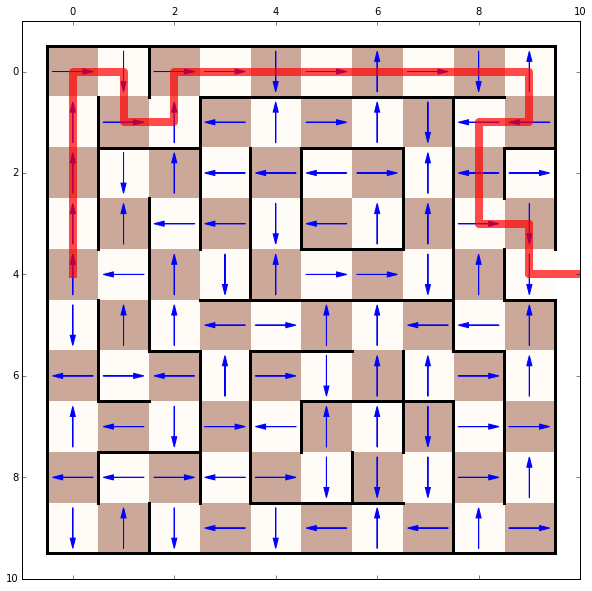

In [10]:
mapa1.list_caminos[0].draw_directions()
mapa1.list_caminos[0].draw_path(0.7)

La respuesta a por qué se forman bucles está en cómo se define la función de fitness o puntuación de cada camino:

- Se recorren 50 casillas, intentando seguir el camino que determinan las flechas
- Cada vez que se **choca con una pared**, o que se vuelve a la casilla anterior (por ejemplo, si dos flechas se apuntan mutuamente), **se pierden puntos**.
- Se obtiene una puntuación mejor cuanto más a la derecha acabe el caminante.
- Se obtiene una gran bonificación si se llega a la salida

En este ejercicio, un bucle es un optimo local: Al no chocarse con nada al recorrerlo, la puntuación es mejor que la de caminos ligeramente diferentes, que terminarían chocando con las paredes varias veces.

Sin embargo, no es la solución que buscamos. Tenemos que potenciar la exploración lejos de estos máximos locales.

Una manera de hacerlo es con feromonas, parecido a lo que hicimos con las hormigas.

Supongamos que cada persona que camina por el laberinto, deja por cada casilla por la que pasa un olor desagradable, que hace que los que vuelvan a pasar por allí intenten evitar ese camino. La manera de implementar esto en el algoritmo es añadir un rastro de feromonas, y luego tener en cuenta la cantidad de feromonas encontradas al calcular la puntuación. ¿Cómo crees que eso afectaría a los bucles?

Probémoslo!

1·2·3·4·5·6·7·8·9·10·11·12·13·14·15·16·17·18·19·20·21·22·23·24·25·26·27·28·29·30·31·32·33·34·35·36·37·38·39·40·41·42·43·44·45·46·47·48·49·50·51·52·53·54·55·56·57·58·59·60·61·62·63·64·65·66·67·68·69·70·71·72·73·74·75·76·77·78·79·80·81·82·83·84·85·86·87·88·89·90·91·92·93·94·95·96·97·98·99·100·

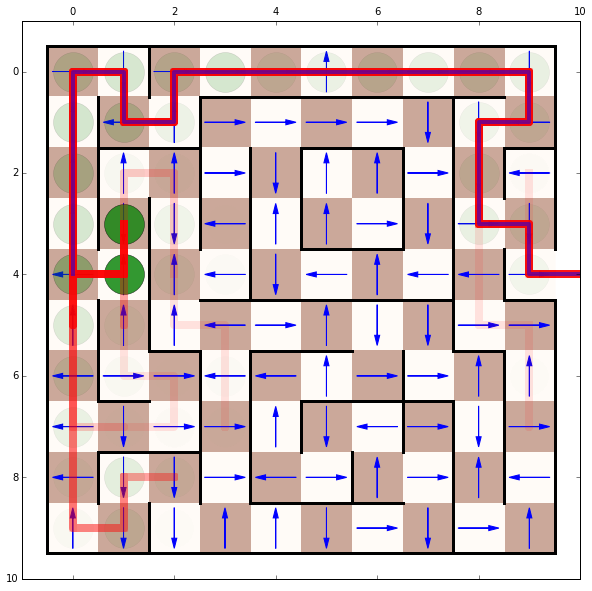

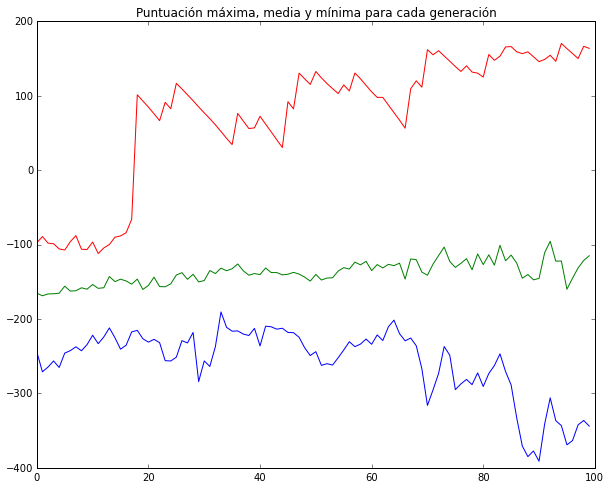

In [11]:
mapa1 = lab.Map(veneno=1)
lab.avanzar(mapa1)
lab.draw_all(mapa1)

Prueba e ejecutarlo varias veces. ¿Notas si ha cambiado la cantidad de bucles?

Por último, veamos que ocurre si potenciamos la exploración demasiado:

1·2·3·4·5·6·7·8·9·10·11·12·13·14·15·16·17·18·19·20·21·22·23·24·25·26·27·28·29·30·31·32·33·34·35·36·37·38·39·40·41·42·43·44·45·46·47·48·49·50·51·52·53·54·55·56·57·58·59·60·61·62·63·64·65·66·67·68·69·70·71·72·73·74·75·76·77·78·79·80·81·82·83·84·85·86·87·88·89·90·91·92·93·94·95·96·97·98·99·100·

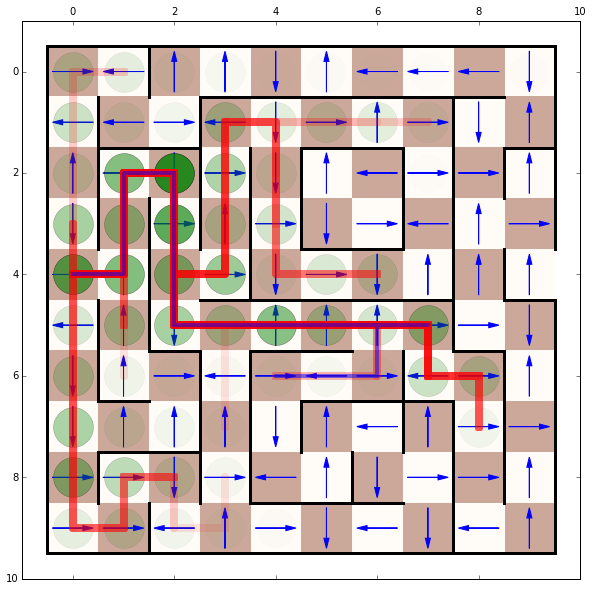

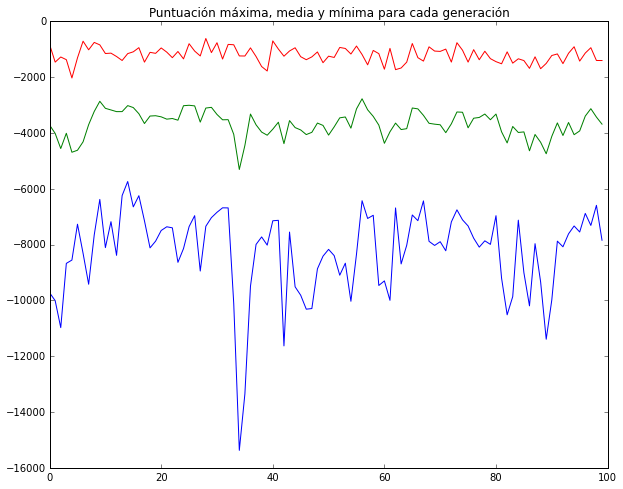

In [12]:
mapa1 = lab.Map(veneno=100)
lab.avanzar(mapa1)
lab.draw_all(mapa1)

¿Cómo explicas lo que ocurre? ¿Por qué hemos perdido la capacidad para encontrar soluciones al potenciar demasiado la exploración?

Siro Moreno, Aeropython, 19 de Noviembre de 2015
